# Proyecto

Librería

In [ ]:
!python -m spacy download es

✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/es_core_news_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/es
You can now load the model via spacy.load('es')


In [ ]:
import pandas as pd
import missingno as msno
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import collections
import re
import nltk
import en_core_web_sm
import os
import string
from bs4 import BeautifulSoup
from collections import Counter
from string import  punctuation
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_score
from nltk.tokenize import regexp_tokenize, WhitespaceTokenizer
from nltk.stem import  WordNetLemmatizer
from nltk.corpus import  stopwords
from spacy.lang.es.stop_words import STOP_WORDS
from spacy.lang.es import Spanish
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.tokenize import RegexpTokenizer  
from numpy import dot
from numpy.linalg import norm
from wordcloud import WordCloud, STOPWORDS
from spacy.matcher import Matcher


In [ ]:
!pwd

/content/proyecto


In [ ]:
%cd content/

[Errno 2] No such file or directory: 'content/'
/content


In [ ]:
!mkdir proyecto

In [ ]:
!ls -la

total 7276
drwxr-xr-x 2 root root    4096 Dec 20 20:31 .
drwxr-xr-x 1 root root    4096 Dec 20 20:30 ..
-rw-r--r-- 1 root root 7440937 Dec 20 20:32 covid.csv


In [ ]:
%cd proyecto/

/content/proyecto


## Cargar Datos

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving covid.csv to covid.csv


In [ ]:
!ls -la

total 7276
drwxr-xr-x 2 root root    4096 Dec 20 20:31 .
drwxr-xr-x 1 root root    4096 Dec 20 20:30 ..
-rw-r--r-- 1 root root 7440937 Dec 20 20:32 covid.csv


In [ ]:
df= pd.read_csv("covid.csv", error_bad_lines=False, encoding="utf-8")
df.head()

,Unnamed: 0,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
0,1,Estado de mexico https://t.co/t9drwQWRQT,False,0,NaN,12/12/2020 19:48,False,NaN,1.340000e+18,NaN,"<a href=""http://twitter.com/download/android"" ...",HctorBanderas1,0,False,False,NaN,NaN
1,2,#ÚLTIMAHORA |<U+0001F6A8>\r\n\r\n<U+0001F4CC> ...,False,0,NaN,12/12/2020 19:47,True,NaN,1.340000e+18,NaN,"<a href=""http://twitter.com/download/iphone"" r...",CentinelaMundo,0,False,False,NaN,NaN
2,3,Mientras tanto en México: \r\n“El Covid-19 no ...,False,0,NaN,12/12/2020 19:46,False,NaN,1.340000e+18,NaN,"<a href=""http://twitter.com/download/iphone"" r...",chemamerta,0,False,False,NaN,NaN
3,4,@LillyTellez @HLGatell @FGRMexico Los únicos r...,False,0,LillyTellez,12/12/2020 19:45,True,1.340000e+18,1.340000e+18,225101516.0,"<a href=""http://twitter.com/download/iphone"" r...",ramonls1986,0,False,False,NaN,NaN
4,5,En una semana llegaría a México el primer enví...,False,0,NaN,12/12/2020 19:45,False,NaN,1.340000e+18,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Fidedignas,0,False,False,NaN,NaN


# Estadísticas generales

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     24000 non-null  int64  
 1   text           24000 non-null  object 
 2   favorited      24000 non-null  bool   
 3   favoriteCount  24000 non-null  int64  
 4   replyToSN      3912 non-null   object 
 5   created        24000 non-null  object 
 6   truncated      24000 non-null  bool   
 7   replyToSID     3369 non-null   float64
 8   id             24000 non-null  float64
 9   replyToUID     3912 non-null   float64
 10  statusSource   23969 non-null  object 
 11  screenName     24000 non-null  object 
 12  retweetCount   24000 non-null  int64  
 13  isRetweet      24000 non-null  bool   
 14  retweeted      24000 non-null  bool   
 15  longitude      17 non-null     float64
 16  latitude       17 non-null     float64
dtypes: bool(4), float64(5), int64(3), object(5)
memory

# Forma del Dataframe

In [ ]:
df.shape

(24000, 17)

In [ ]:
df.shape[0]

24000

In [ ]:
df.columns.values.tolist()

['Unnamed: 0',
 'text',
 'favorited',
 'favoriteCount',
 'replyToSN',
 'created',
 'truncated',
 'replyToSID',
 'id',
 'replyToUID',
 'statusSource',
 'screenName',
 'retweetCount',
 'isRetweet',
 'retweeted',
 'longitude',
 'latitude']

In [ ]:
df.dtypes

Unnamed: 0         int64
text              object
favorited           bool
favoriteCount      int64
replyToSN         object
created           object
truncated           bool
replyToSID       float64
id               float64
replyToUID       float64
statusSource      object
screenName        object
retweetCount       int64
isRetweet           bool
retweeted           bool
longitude        float64
latitude         float64
dtype: object

In [ ]:
df.isnull().any().any()

True

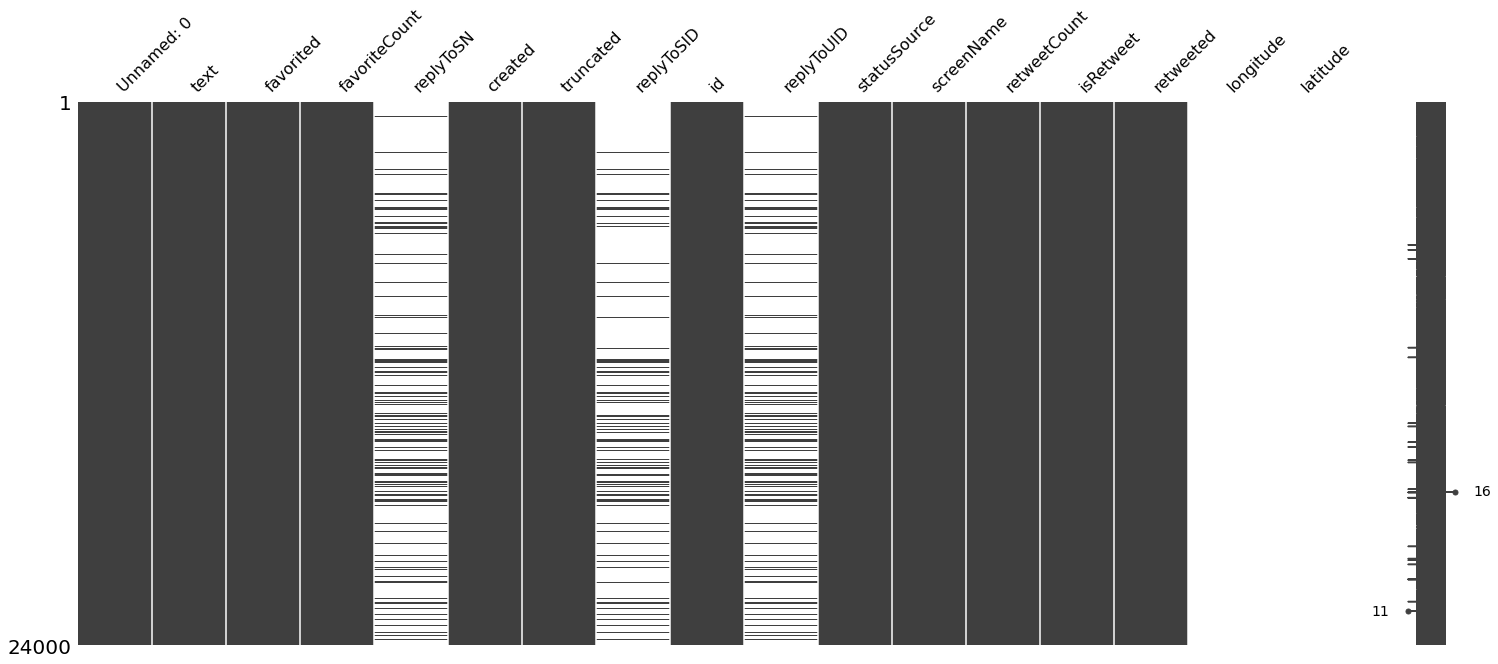

In [ ]:
msno.matrix(df)

In [ ]:
df.replace({' ': np.nan}, inplace=True)

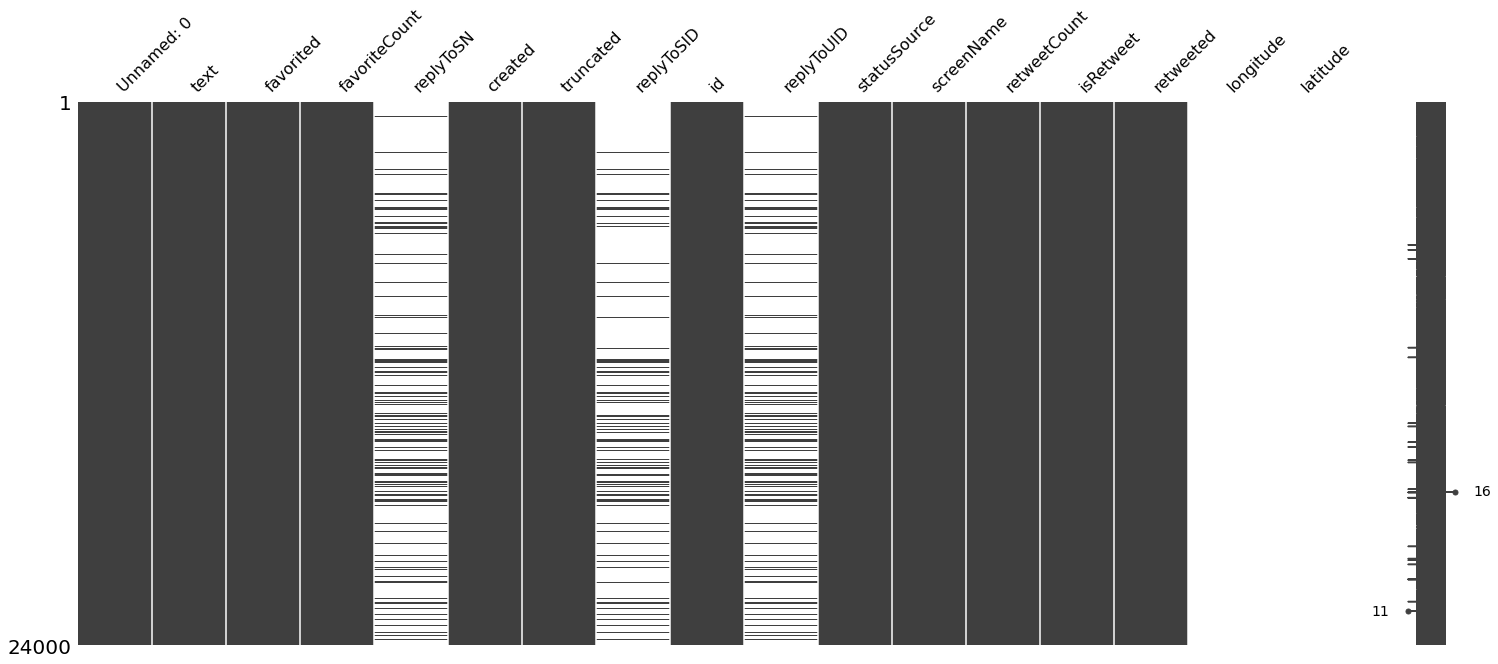

In [ ]:
msno.matrix(df)

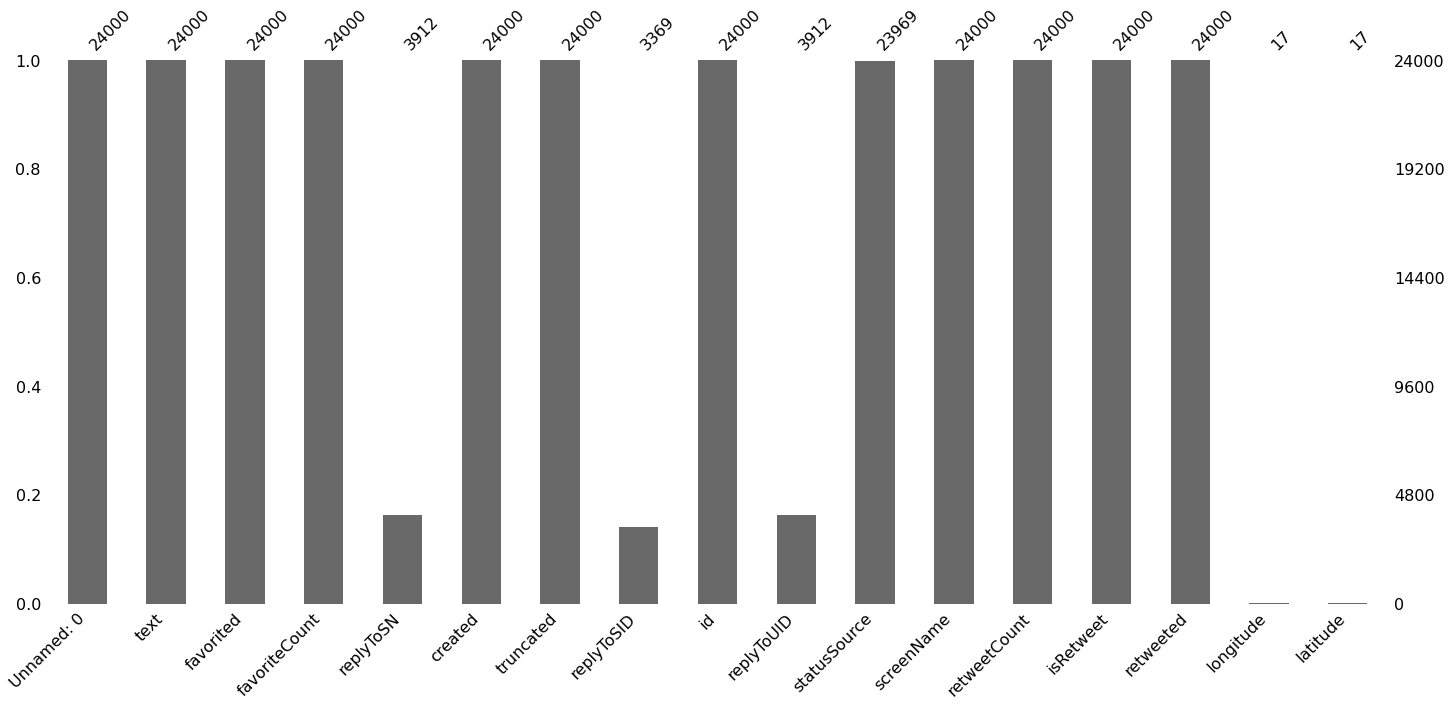

In [ ]:
msno.bar(df)

In [ ]:
#Nuestros atributos a utilizar no estan vacios
df.columns[df.isnull().any()].tolist()

['replyToSN',
 'replyToSID',
 'replyToUID',
 'statusSource',
 'longitude',
 'latitude']

In [ ]:
list(df['screenName'].unique())

['HctorBanderas1',
 'CentinelaMundo',
 'chemamerta',
 'ramonls1986',
 'Fidedignas',
 'IvoSnz',
 'erove1',
 'elsolde_mexico',
 'nuevolaredotv',
 'canal29nld',
 'postopinion_es',
 'cronos58',
 'poenmo',
 'mas_lucha',
 'agronoticiasmx',
 'PaoOo_Ramirez',
 'ComunicaSinaloa',
 'AraBonita_',
 'noticiascanal10',
 'Siricui',
 'EsmyPacheco',
 'El_Cooperante',
 'LaGazzettaDF',
 'Tucanal10',
 'MVSNoticias',
 'proceso',
 'esmeestrada915',
 'buzonxalapa',
 'OITMexico',
 'lavozfrontera',
 'Zacatecas3_0',
 'ZonaFrancaMX',
 'escutia_sanchez',
 'ivansandovalofi',
 'Richard92197563',
 'FranLuvaOPCmx',
 'soga1965',
 '1victorvictoria',
 'vernemexico',
 '_MiBolsillo',
 'foxmarsony',
 'mi_misma_',
 'LvdNoticias',
 'LVerdadNoticias',
 'ElSoldeCuautla',
 'bicoraggio',
 'PeriodismoHoyMX',
 'AlonsoRaya_',
 'Armando_Frias_',
 'marielzuniga_',
 'jbarrios107',
 'MuyInteresanteM',
 'mikevelazquezs',
 'JulioSeRoa',
 'ElSabuesoAP',
 'revistaetcetera',
 'Radio_Zocalo',
 'GroupZirigoza',
 'lineadecontrast',
 'tomateloa

# Seleccionar datos

In [ ]:
data =df[['screenName','text' ]].copy()
data.head()

,screenName,text
0,HctorBanderas1,Estado de mexico https://t.co/t9drwQWRQT
1,CentinelaMundo,#ÚLTIMAHORA |<U+0001F6A8>\r\n\r\n<U+0001F4CC> ...
2,chemamerta,Mientras tanto en México: \r\n“El Covid-19 no ...
3,ramonls1986,@LillyTellez @HLGatell @FGRMexico Los únicos r...
4,Fidedignas,En una semana llegaría a México el primer enví...


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopwords.fileids()

['arabic',
 'azerbaijani',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'slovene',
 'spanish',
 'swedish',
 'tajik',
 'turkish']

In [ ]:
set(stopwords.words('spanish'))

{'a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f

In [ ]:
#Eliminar hashtags y caracteres acentos
def clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].astype(str).apply(lambda x: x.replace('á', 'a'))
    df[text_field] = df[text_field].apply(lambda x: x.replace('é', 'e'))
    df[text_field] = df[text_field].apply(lambda x: x.replace('í', 'i'))
    df[text_field] = df[text_field].apply(lambda x: x.replace('ó', 'o'))
    df[text_field] = df[text_field].apply(lambda x: x.replace('ú', 'u'))
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|t^rt|http.+?", "", str(elem)))
    return df
    

In [ ]:
data['text']

0                 Estado de mexico https://t.co/t9drwQWRQT
1        #ÚLTIMAHORA |<U+0001F6A8>\r\n\r\n<U+0001F4CC> ...
2        Mientras tanto en México: \r\n“El Covid-19 no ...
3        @LillyTellez @HLGatell @FGRMexico Los únicos r...
4        En una semana llegaría a México el primer enví...
                               ...                        
23995    Con el fin de evitar “Las tres C” este año no ...
23996    La @CDHCMX ha recibido Mil 466 quejas relacion...
23997    “Hola @HLGatell @lopezobrador_. Él es mi papá,...
23998    <U+0001F6D1>Las proyecciones de @ArturoErdely ...
23999    #Covid_19mx no entiendo porque? Chingar tanto ...
Name: text, Length: 24000, dtype: object

In [ ]:
data_clean1 = clean_text(data,'text')
data_clean1['text']

0                                        estado de mexico 
1        ultimahora u0001f6a8u0001f4cc  u0001f534 gobie...
2        mientras tanto en mexico el covid19 no existe ...
3           los unicos responsables de todas las muerte...
4        en una semana llegaria a mexico el primer envi...
                               ...                        
23995    con el fin de evitar las tres c este ao no hab...
23996    la  ha recibido mil 466 quejas relacionadas al...
23997    hola   el es mi papa se llama jorge murio ayer...
23998    u0001f6d1las proyecciones de  estiman 120 mil ...
23999    covid19mx no entiendo porque chingar tanto a l...
Name: text, Length: 24000, dtype: object

In [ ]:
def clean_text_(df, text_field):
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(u0\w+)|(u1\w+)|(u2\w+)|(u3\w+)|(u4\w+)|(u5\w+)|(u6\w+)|(u7\w+)|(u8\w+)|(u9\w+)", " ", str(elem)))
  return df

In [ ]:
data_clean = clean_text_(data_clean1,'text')
data_clean['text']

0                                        estado de mexico 
1        ultimahora      gobierno de la cdmx recorta ho...
2        mientras tanto en mexico el covid19 no existe ...
3           los unicos responsables de todas las muerte...
4        en una semana llegaria a mexico el primer envi...
                               ...                        
23995    con el fin de evitar las tres c este ao no hab...
23996    la  ha recibido mil 466 quejas relacionadas al...
23997    hola   el es mi papa se llama jorge murio ayer...
23998      proyecciones de  estiman 120 mil muertes y 1...
23999    covid19mx no entiendo porque chingar tanto a l...
Name: text, Length: 24000, dtype: object

# Tokenizar datos

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')

In [ ]:
#Crear lista de puntuaciones
punctuations = string.punctuation
punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
set(stopwords.words('spanish'))
nlp = spacy.load("en_core_web_sm")
stop_words =stopwords.words('spanish') #spacy.lang.es.stop_words.STOP_WORDS
print(stop_words)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [ ]:
parser = Spanish()
parser

In [ ]:
#Crear función Tokenizadora
exclude =['covid', 'covid19', 'ultimahora']
def tokenizer(sentence):
    nytokens=parser(sentence)
    nytokens = [ word.lemma_.lower().strip() if word.lemma_ != 'PRON' else word.lower_ for word in nytokens ]
    nytokens = [ word for word in nytokens if word  not in stop_words and word  not in punctuations and word not in exclude ]
    nytokens = ' '.join([i for i in nytokens])
    return nytokens


In [ ]:
data_clean.text = data_clean.text.apply(tokenizer)
data_clean.text.head(40)


0                                                mexico
1     gobierno cdmx recorta horarios negocios centro...
2     mientras mexico existe inventotambien mexicomi...
3     unicos responsables todas muertes aqui mexico neo
4     semana llegaria mexico primer envio vacuna pfizer
5     cdmex contingencia suspende funcion lucha libr...
6     aristegui noticias alerta emergencia alguna du...
7     mucha atencion anuncian nuevas medidas reducir...
8     grupo 50 trabajadores secretaria salud chiapas...
9     grupo 50 trabajadores secretaria salud chiapas...
10    basta disponer dosis suficientes vacuna tambie...
11    seleccion corea sur suma dos casos mas partido...
12    seleccion corea sur suma dos casos mas partido...
13    funcion planeada realizarse sabado 19 diciembr...
14          importacion leche hacia mexico cayo 8 usdec
15    pues parecer hizo mandados abuelita 95 aosaun ...
16     mexico aprobo emergencia vacuna pfizer ybiontech
17    dias veo numeros muertos muertos mas muert

In [ ]:
#Crear Corpus
corpus = []
dataframe = data_clean.text
news = dataframe.str.split().values.tolist()
corpus = [word.lower().strip() for i in news for word in i]
corpus[:10]

['mexico',
 'gobierno',
 'cdmx',
 'recorta',
 'horarios',
 'negocios',
 'centrohistoricotras',
 'declarar',
 'ciu',
 'mientras']

[('cdmx', 11102), ('mexico', 4714), ('semaforo', 3990), ('rojo', 2357), ('vacuna', 1708), ('mas', 1669), ('gobierno', 1473), ('casos', 1435), ('si', 1398), ('contagios', 1300), ('mil', 1271), ('alerta', 1090), ('naranja', 1071), ('emergencia', 1009), ('salud', 991), ('medidas', 920), ('sheinbaum', 916), ('edomex', 808), ('pandemia', 806), ('lopezgatell', 779)]


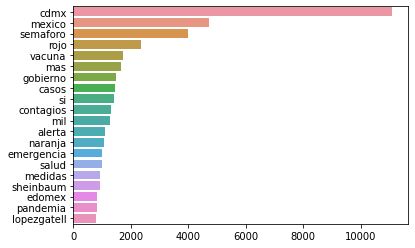

In [ ]:
n_most = 20
most=Counter(corpus).most_common(n_most)
x, y = [], []
print (most)
for word, count in most:
  x.append(word)
  y.append(count)
sns.barplot(x=y, y=x)

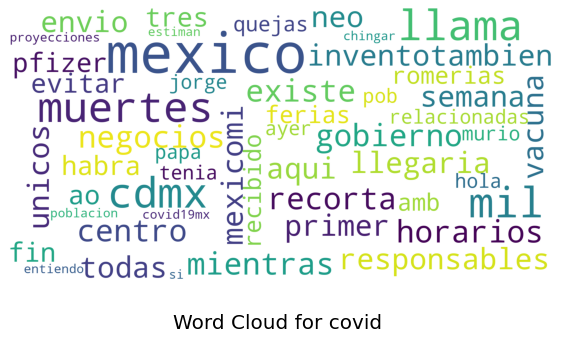

In [ ]:
word_cloud = WordCloud(
                    background_color='white',
                    stopwords=set(STOPWORDS),
                    max_words=50,
                    max_font_size=40,
                    scale=5,
                    random_state=1).generate(str(data_clean['text']))
fig = plt.figure(1, figsize=(10,10))
plt.axis('off')
fig.suptitle('Word Cloud for covid', fontsize=20)
fig.subplots_adjust(top=2.3)
plt.imshow(word_cloud)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize

data_test = data_clean.text 

tf_idf_vectorizor =TfidfVectorizer(stop_words=stopwords.words("spanish"),
                                   min_df=0.001,   
                                    ngram_range=(2, 2), #bigram
                                    max_features=200000)

tf_idf = tf_idf_vectorizor.fit_transform(data_test)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

In [ ]:
print(tf_idf.shape)

(24000, 576)


In [ ]:
tf_idf_vectorizor.get_feature_names()[:10]

['10 13',
 '10 diciembre',
 '10 enero',
 '100 mil',
 '107 mil',
 '11 12',
 '11 diciembre',
 '11 mil',
 '112 mil',
 '112326 muertes']

# K-Means

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)

In [ ]:
import plotly.express as px
fig = px.scatter(x=Y_sklearn[:, 0], y=Y_sklearn[:, 1])  
fig.update_traces(textposition='top center')
fig.update_layout(
    height=800,
    title_text='tweets clustering'
)

fig.show()

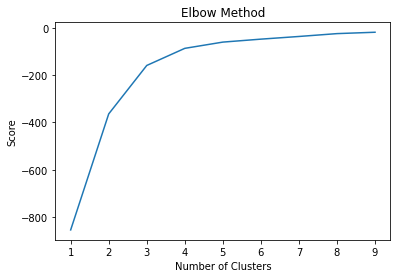

In [ ]:
number_clusters = range(1, 10)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
kmeans

score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]
score

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

In [ ]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster, the most cluster is...
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = tf_idf_vectorizor.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

In [ ]:
dfs = get_top_features_cluster(tf_idf_array, prediction, 5)

In [ ]:
len(dfs)

5

In [ ]:
", ".join(dfs[0].features.unique())

'semaforo naranja, basilica guadalupe, vacuna pfizer, semaforo cdmx, cdmx edomex'

In [ ]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

#set up cluster names using a dict
cluster_names = {0: ", ".join(dfs[0].features.unique()), 
                 1: ", ".join(dfs[1].features.unique()), 
                 2: ", ".join(dfs[2].features.unique()),
                 3: ", ".join(dfs[3].features.unique()),
                 4: ", ".join(dfs[4].features.unique())}

In [ ]:
cluster_names

{0: 'semaforo naranja, basilica guadalupe, vacuna pfizer, semaforo cdmx, cdmx edomex',
 1: 'semaforo rojo, rojo cdmx, cdmx semaforo, cdmx edomex, rojo semaforo',
 2: 'gobierno cdmx, jefa gobierno, semaforo rojo, claudia sheinbaum, cdmx claudia',
 3: 'ciudad mexico, jefa gobierno, gobierno cdmx, gobierno ciudad, claudia sheinbaum',
 4: 'semaforo rojo, rojo cdmx, cdmx edomex, regresan semaforo, cdmx mexico'}

In [ ]:
%matplotlib inline 
df_final = pd.DataFrame(dict(x=Y_sklearn[:, 0], 
                          y=Y_sklearn[:, 1], 
                          label=prediction, 
                          name=data.screenName)) 

groups = df_final.groupby('label')
groups.count()

,x,y,name
label,,,
0,21063,21063,21063
1,622,622,622
2,284,284,284
3,974,974,974
4,1057,1057,1057


In [ ]:
df_final.head()

,x,y,label,name
0,-0.037337,-0.019122,0,HctorBanderas1
1,-0.029215,0.713946,2,CentinelaMundo
2,-0.037337,-0.019122,0,chemamerta
3,-0.037337,-0.019122,0,ramonls1986
4,-0.051905,-0.056386,0,Fidedignas


In [ ]:
df_final.label.value_counts()

0    21063
4     1057
3      974
1      622
2      284
Name: label, dtype: int64

In [ ]:
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

In [ ]:
df.columns

Index(['Unnamed: 0', 'text', 'favorited', 'favoriteCount', 'replyToSN',
       'created', 'truncated', 'replyToSID', 'id', 'replyToUID',
       'statusSource', 'screenName', 'retweetCount', 'isRetweet', 'retweeted',
       'longitude', 'latitude'],
      dtype='object')

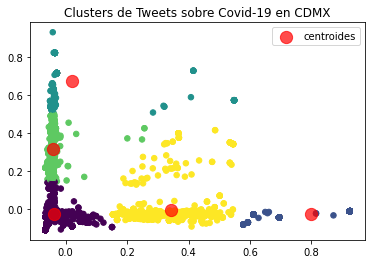

In [ ]:
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c= kmeans.labels_, s=30, cmap='viridis')
centers = fitted.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],c='red', s=150, alpha=0.7, label = 'centroides')
plt.title("Clusters de Tweets sobre Covid-19 en CDMX")
plt.legend()
plt.show();

In [ ]:
import plotly.express as px
df_final["label"]= df_final["label"].astype(str)

df_final["screenName"] = df["screenName"]

df_final["text"] = df["text"]

In [ ]:
fig = px.scatter(df_final.sample(100).dropna(), x="x", y="y", 
                 color="label",  # label, user_location
                 hover_data = ["screenName", "text"],
                 #size_max=60,
                 text="screenName")

fig.update_traces(textposition='top center')

fig.update_layout(
    height=800,
    title_text='tweets clustering'
)

fig.show()

# Validacion K-Fold

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
# create dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=100, random_state=1)
# create model
model = KMeans()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.123 (0.060)


>1 mean=0.1270 se=0.020
>2 mean=0.1525 se=0.014
>3 mean=0.1290 se=0.012
>4 mean=0.1258 se=0.008
>5 mean=0.1434 se=0.008
>6 mean=0.1265 se=0.008
>7 mean=0.1226 se=0.007
>8 mean=0.1259 se=0.006
>9 mean=0.1293 se=0.006
>10 mean=0.1162 se=0.006
>11 mean=0.1273 se=0.006
>12 mean=0.1250 se=0.005
>13 mean=0.1167 se=0.005
>14 mean=0.1332 se=0.005
>15 mean=0.1221 se=0.005


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



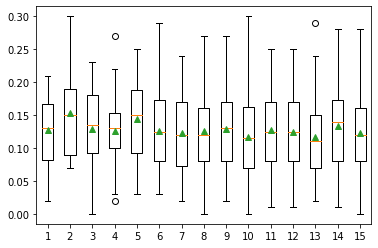

In [ ]:
# compare the number of repeats for repeated k-fold cross-validation
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
 
# evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats):
	# prepare the cross-validation procedure
	cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
	# create model
	model = KMeans ()
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# create dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# configurations to test
repeats = range(1,16)
results = list()
for r in repeats:
	# evaluate using a given number of repeats
	scores = evaluate_model(X, y, r)
	# summarize
	print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
	# store
	results.append(scores)
# plot the results
pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()